In [ ]:
%load_ext sql

# 1) An Introduction to Window Framing

In this lesson, we'll learn about window framing, which lets us specify a window smaller than the partition. For example, with framing, we can precisely define a window that starts from the beginning of the result set and stops at the current row or define a window containing three rows before and three rows after the current row.

With frames, we can define a **window containing exactly those rows** in relation to the current row that should be considered when computing the results.

After you finish this lesson, you'll have a good understanding of the following:

* What the window framing is, and why it's important for the accuracy of the query's results

* Defining window frames and the difference between `ROW` and `RANGE`

* Applying window frames to running and moving aggregates

# 2) Window Framing Syntax

Window framing defines two endpoints in relation to the current row within the partition. The calculation applies to the frame based on the given ordering.

The standard SQL framing specification includes a ROWS, RANGE, or GROUPS option. To define a window frame, we can use the following syntaxes:

* `ROWS BETWEEN starting expression AND ending expression`

* `RANGE BETWEEN starting expression AND ending expression`

* `GROUPS BETWEEN starting expression AND ending expression`

The `starting expression` supports the following terms:

| Framing Term        | Definition                                                                             |
|---------------------|----------------------------------------------------------------------------------------|
| N PRECEDING         | The frame starts at Nth rows before the current row. Only supported with ROWS keyword. |
| UNBOUNDED PRECEDING | The frame starts at the first row of the partition.                                    |
| CURRENT ROW         | The row of the current calculation.                                                    |

Also, the `ending expression` supports the following terms:

| Framing Term        | Definition                                                                              |
|---------------------|-----------------------------------------------------------------------------------------|
| M FOLLOWING         | The frame ends at the Mth row after the current row. Only supported with ROWS keyboard. |
| UNBOUNDED FOLLOWING | The frame ends at the final row of the partition.                                       |
| CURRENT ROW         | The row of the current calculation.                                                     |

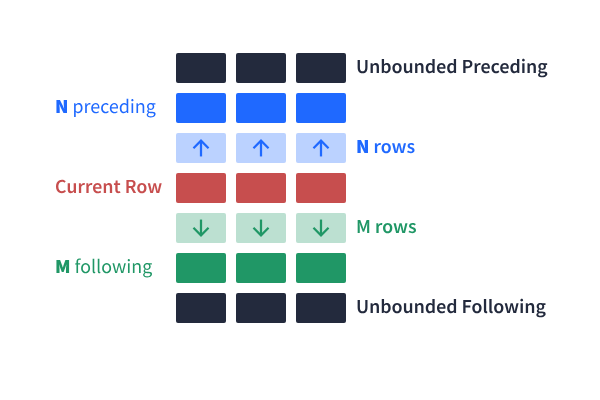

Window framing allows us to look around the neighborhood of a row. For example, we might want to calculate in a sliding window that looks at the previous, current, and subsequent value of sales quantity and **average them** as follows:

```
SELECT *,
       AVG(quantity) OVER(ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING) AS avg_quantity
  FROM apple_sales_quantity_by_month;
```

In [ ]:
%%sql
create table phone_sales_by_month\n(\n    sales_date date,\n    brand      varchar(250),\n    model      varchar(250),\n    quantity   integer,\n    unit_price numeric(10, 2)\n);\n\n\ncreate table phone_sales_revenue_by_month\n(\n    sales_date date,\n    brand      varchar(250),\n    revenue    numeric(10, 2)